# Make Splines

Need to do some jiggery pokery with the tune files, catted below for posterity. I have copied the AR23_10i tune folder from `$GENIE/config` and modified `CommonParam.xml` as below

In [31]:
%%script bash --no-raise-error
diff ~/software/GENIE/Generator-liang/config/AR23_20i/CommonParam.xml ~/software/GENIE/zexp_tune/AR24_10z/CommonParam.xml

219a220,244
> <!--
> 	~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
> 	Value of proton electric form factor at Q2=0
>    -->
>    <param type="double" name="QEL-Gep0"> 1 </param>
> 
>    <!--
>         ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
> 	Value of proton magnetic form factor at Q2=0
>    -->
>    <param type="double" name="QEL-Gmp0"> 2.793 </param>
> 
>    <!--
> 	~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
> 	Value of neutron electric form factor at Q2=0
>    -->
>    <param type="double" name="QEL-Gen0"> 0 </param>
> 
>    <!--
> 	~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
> 	Value of neutron magnetic form factor at Q2=0
>    -->
>    <param type="double" name="QEL-Gmn0"> -1.913042 </param>
> 
> 
247c272
<     <param type="alg" name="ElasticFormFactorsModel"> genie::BBA07ELFormF

Generate new splines for the QE process as below

In [ ]:
%%script bash --no-raise-error
export GENIE_XSEC_TUNE=AR24_10z_00_000
export GXMLPATH=${HOME}/software/GENIE/zexp_tune:${GXMLPATH}
export GENIE_XSEC_FILE=${HOME}/software/GENIE/zexp_tune/ArQE.xml
echo gmkspl -t 1000180400 -n 100 -e 100 -p 14 \
    --tune ${GENIE_XSEC_TUNE} --event-generator-list QE \
    -o ${GENIE_XSEC_FILE}

# Generate Some Events

In [45]:
%%script bash --no-raise-error
echo -e ".ls\n.q" | root -l -b ${HOME}/software/NUISANCEMC/nuisance/data/flux/flux_dune_neutrino_ND.root


Attaching file /root/software/NUISANCEMC/nuisance/data/flux/flux_dune_neutrino_ND.root as _file0...
(TFile *) 0x17e68420
TFile**		/root/software/NUISANCEMC/nuisance/data/flux/flux_dune_neutrino_ND.root	
 TFile*		/root/software/NUISANCEMC/nuisance/data/flux/flux_dune_neutrino_ND.root	
  KEY: TH1D	numu_flux;1	numu_flux
  KEY: TH1D	numubar_flux;1	numubar_flux
  KEY: TH1D	nue_flux;1	nue_flux
  KEY: TH1D	nuebar_flux;1	nuebar_flux
  KEY: TH1D	nutau_flux;1	nutau_flux
  KEY: TH1D	nutaubar_flux;1	nutaubar_flux
  KEY: TH1D	numu_cceventrate;1	numu_cceventrate
  KEY: TH1D	numubar_cceventrate;1	numubar_cceventrate
  KEY: TH1D	nue_cceventrate;1	nue_cceventrate
  KEY: TH1D	nuebar_cceventrate;1	nuebar_cceventrate
  KEY: TH1D	nutau_cceventrate;1	nutau_cceventrate
  KEY: TH1D	nutaubar_cceventrate;1	nutaubar_cceventrate
  KEY: TH1D	numu_nceventrate;1	numu_nceventrate
  KEY: TH1D	numubar_nceventrate;1	numubar_nceventrate
  KEY: TH1D	nue_nceventrate;1	nue_nceventrate
  KEY: TH1D	nuebar_nceventrate;1	nueba

In [53]:
%%script bash --no-raise-error
FLUXF=${HOME}/software/NUISANCEMC/nuisance/data/flux/flux_dune_neutrino_ND.root
FLUXH=numu_flux

GENIE_XSEC_TUNE=AR24_10z_00_000
GXMLPATH=${HOME}/software/GENIE/zexp_tune:${GXMLPATH}
GENIE_XSEC_FILE=${HOME}/software/GENIE/zexp_tune/ArQE.xml

mkdir genie_gen; cd genie_gen
gevgen -p 14 -e 0.1,10 -n 1000 --event-generator-list QE \
        --tune ${GENIE_XSEC_TUNE} --cross-sections ${GENIE_XSEC_FILE} \
        -t 1000180400 -f ${FLUXF},${FLUXH} -o Ar.GHep.root

1721634431 NOTICE Messenger : [s] <SetPrioritiesFromXmlFile (136)> : Reading msg stream priorities from XML file: /opt/genie/3_04_02/config/Messenger.xml
1721634431 INFO TuneId : [n] <TuneId.cxx::Build (132)> : AR24_10z_00_000 Tune configured 
1721634431 INFO RunOpt : [n] <RunOpt.cxx::BuildTune (94)> : Building tune AR24_10z_00_000
1721634431 INFO TuneId : [n] <TuneId.cxx::Build (132)> : AR24_10z_00_000 Tune configured 
1721634431 NOTICE PointGeom : [n] <PointGeomAnalyzer.cxx::Initialize (112)> : 
[-]
 |---o            Ar40 (PDG code = 1000180400)
1721634431 NOTICE PointGeom : [n] <PointGeomAnalyzer.cxx::Initialize (113)> : 
[-]
 |---o code: 1000180400 [ Ar40] -----> path-length = 1
1721634431 FATAL AlgFactory : [n] <AlgFactory.cxx::GetAlgorithm (107)> : Algorithm: genie::ZExpELFormFactorModel/Default could not be instantiated


# Parameters

Come from supplementary material from here: https://journals.aps.org/prd/abstract/10.1103/PhysRevD.102.074012

16 free parameters `(A,B) X (P,N) X [1,2,3,4]`

In [1]:
%cat prd_submit_supplementary/proton_coefs_kmax8.dat

-1.485958065859	-0.096104515639	1.823367310007	1.287051328146
-4.087902402976	0.175515803136	4.861856163076	-0.982798179847

Read the central values of the free parameters from the fit into the paper

In [2]:
import numpy as np

AP_CVs = np.genfromtxt('prd_submit_supplementary/proton_coefs_kmax8.dat', delimiter='\t')[0]
BP_CVs = np.genfromtxt('prd_submit_supplementary/proton_coefs_kmax8.dat', delimiter='\t')[1]

print(f"A^P_CV = {AP_CVs}")
print(f"B^P_CV = {BP_CVs}")

AN_CVs = np.genfromtxt('prd_submit_supplementary/GEn_coefs_kmax8.dat', delimiter='\t')
BN_CVs = np.genfromtxt('prd_submit_supplementary/GMn_coefs_kmax8.dat', delimiter='\t')

print(f"A^N_CV = {AN_CVs}")
print(f"B^N_CV = {BN_CVs}")

A^P_CV = [-1.48595807 -0.09610452  1.82336731  1.28705133]
B^P_CV = [-4.0879024   0.1755158   4.86185616 -0.98279818]
A^N_CV = [ 0.08425268 -0.27857222 -0.15391631  0.35399997]
B^N_CV = [ 2.70678456 -0.42430523 -2.66245307  0.06758308]


Read the correlated uncertainties for the free parameters from the fit into the paper

In [3]:
XP_cov = np.genfromtxt('prd_submit_supplementary/proton_cov.dat', delimiter='\t')
print(f"XP_cov = {XP_cov}")
AN_cov = np.genfromtxt('prd_submit_supplementary/GEn_cov.dat', delimiter='\t')
print(f"AN_cov = {AN_cov}")
BN_cov = np.genfromtxt('prd_submit_supplementary/GMn_cov.dat', delimiter='\t')
print(f"BN_cov = {BN_cov}")

XP_cov = [[ 9.37323800e-05  1.53491405e-04 -1.04770799e-03  7.33569760e-05
  -1.16564457e-04  1.05352893e-03 -4.41307941e-04 -6.81674644e-03]
 [ 1.53491405e-04  2.72255397e-03  2.00429513e-03 -1.93066729e-02
  -1.04320599e-03 -1.12325715e-03  2.23399649e-02 -1.62318211e-02]
 [-1.04770799e-03  2.00429513e-03  2.16327899e-02 -3.75785070e-02
   4.83311078e-04 -1.76085840e-02  4.29679117e-02  7.94517278e-02]
 [ 7.33569760e-05 -1.93066729e-02 -3.75785070e-02  1.65851597e-01
   5.80324774e-03  2.59043551e-02 -1.87423694e-01  1.55864222e-02]
 [-1.16564457e-04 -1.04320599e-03  4.83311078e-04  5.80324774e-03
   8.96779503e-04 -1.71593189e-03 -8.90089319e-03  2.48036261e-02]
 [ 1.05352893e-03 -1.12325715e-03 -1.76085840e-02  2.59043551e-02
  -1.71593189e-03  2.82468715e-02 -5.71237350e-02 -1.50720977e-01]
 [-4.41307941e-04  2.23399649e-02  4.29679117e-02 -1.87423694e-01
  -8.90089319e-03 -5.71237350e-02  3.53318520e-01  4.23899361e-02]
 [-6.81674644e-03 -1.62318211e-02  7.94517278e-02  1.5586422

Compare to GENIE values/errors to make sure we have parameters right

In [4]:
import os

os.environ["GENIE_XSEC_TUNE"] = "AR24_10z_00_000"
os.environ["GXMLPATH"] = os.environ["HOME"] + "/software/GENIE/zexp_tune:" + os.environ["GXMLPATH"]
os.environ["GENIE_XSEC_FILE"] = os.environ["HOME"] + "/software/GENIE/zexp_tune/ArQE.xml"
os.environ["GENIE_XSEC_EVENTGENERATORLIST"] = "QE"

In [18]:
import pyNUISANCE as pn
QELCC_Params = pn.GENIE.XSecAlgorithmParameters("XSecModel@genie::EventGenerator/QEL-CC")

AP_CVs_GENIE = np.array([QELCC_Params[f"FormFactorsAlg/ElasticFormFactorsModel/QEL-Z_AP-{i}"] for i in range(4)])
BP_CVs_GENIE = np.array([QELCC_Params[f"FormFactorsAlg/ElasticFormFactorsModel/QEL-Z_BP-{i}"] for i in range(4)])
AN_CVs_GENIE = np.array([QELCC_Params[f"FormFactorsAlg/ElasticFormFactorsModel/QEL-Z_AN-{i}"] for i in range(4)])
BN_CVs_GENIE = np.array([QELCC_Params[f"FormFactorsAlg/ElasticFormFactorsModel/QEL-Z_BN-{i}"] for i in range(4)])

print(f"A^P_CV = {AP_CVs}")
print(f"A^P_CV_GENIE = {AP_CVs_GENIE}")
print(f"B^P_CV = {BP_CVs}")
print(f"B^P_CV_GENIE = {BP_CVs_GENIE}")
print(f"A^N_CV = {AN_CVs}")
print(f"A^N_CV_GENIE = {AN_CVs_GENIE}")
print(f"B^N_CV = {BN_CVs}")
print(f"B^N_CV_GENIE = {BN_CVs_GENIE}")

A^P_CV = [-1.48595807 -0.09610452  1.82336731  1.28705133]
A^P_CV_GENIE = [-1.48595807 -0.09610452  1.82336731  1.28705133]
B^P_CV = [-4.0879024   0.1755158   4.86185616 -0.98279818]
B^P_CV_GENIE = [-4.0879024   0.1755158   4.86185616 -0.98279818]
A^N_CV = [ 0.08425268 -0.27857222 -0.15391631  0.35399997]
A^N_CV_GENIE = [ 0.08425268 -0.27857222 -0.15391631  0.35399997]
B^N_CV = [ 2.70678456 -0.42430523 -2.66245307  0.06758308]
B^N_CV_GENIE = [ 2.70678456 -0.42430523 -2.66245307  0.06758308]


In [17]:
AP_OneSigmaErrors_GENIE = np.array([ pn.GENIE.OneSigmaErr(f"ZExpELFFAP{i+1}CCQE") for i in range(4)])
BP_OneSigmaErrors_GENIE = np.array([ pn.GENIE.OneSigmaErr(f"ZExpELFFBP{i+1}CCQE") for i in range(4)])
AN_OneSigmaErrors_GENIE = np.array([ pn.GENIE.OneSigmaErr(f"ZExpELFFAN{i+1}CCQE") for i in range(4)])
BN_OneSigmaErrors_GENIE = np.array([ pn.GENIE.OneSigmaErr(f"ZExpELFFBN{i+1}CCQE") for i in range(4)])

AP_OneSigmaErrors = np.sqrt(np.diag(XP_cov)[:4])
BP_OneSigmaErrors = np.sqrt(np.diag(XP_cov)[4:])
AN_OneSigmaErrors = np.sqrt(np.diag(AN_cov))
BN_OneSigmaErrors = np.sqrt(np.diag(BN_cov))

print(f"AP_OneSigmaErrors / AP_CVs = {AP_OneSigmaErrors / AP_CVs}")
print(f"AP_OneSigmaErrors_GENIE = {AP_OneSigmaErrors_GENIE}")
print(f"BP_OneSigmaErrors / BP_CVs = {BP_OneSigmaErrors / BP_CVs}")
print(f"BP_OneSigmaErrors_GENIE = {BP_OneSigmaErrors_GENIE}")
print(f"AN_OneSigmaErrors / AN_CVs = {AN_OneSigmaErrors / AN_CVs}")
print(f"AN_OneSigmaErrors_GENIE = {AN_OneSigmaErrors_GENIE}")
print(f"BN_OneSigmaErrors / BN_CVs = {BN_OneSigmaErrors / BN_CVs}")
print(f"BN_OneSigmaErrors_GENIE = {BN_OneSigmaErrors_GENIE}")

AP_OneSigmaErrors / AP_CVs = [-0.00651536 -0.54293077  0.08066444  0.31642003]
AP_OneSigmaErrors_GENIE = [0.00651536 0.542931   0.0806644  0.31642   ]
BP_OneSigmaErrors / BP_CVs = [-0.00732559  0.95756652  0.12225907 -1.07998303]
BP_OneSigmaErrors_GENIE = [0.00732559 0.957567   0.122259   1.07998   ]
AN_OneSigmaErrors / AN_CVs = [ 0.21150345 -0.22760108 -2.08217945  1.57799225]
AN_OneSigmaErrors_GENIE = [0.211503 0.227601 2.08218  1.57799 ]
BN_OneSigmaErrors / BN_CVs = [ 2.76020960e-02 -7.73313193e-01 -2.83653158e-01  4.14533958e+01]
BN_OneSigmaErrors_GENIE = [2.76021e-02 7.73313e-01 2.83653e-01 4.14534e+01]


In [7]:
Paper_params = {
    "AP": {
        "CV": AP_CVs,
        "OSE": AP_OneSigmaErrors
    },
    "AN": {
        "CV": AN_CVs,
        "OSE": AN_OneSigmaErrors
    },
    "BP": {
        "CV": BP_CVs,
        "OSE": BP_OneSigmaErrors
    },
    "BN": {
        "CV": BN_CVs,
        "OSE": BN_OneSigmaErrors
    },
}
GENIE_params = {
    "AP": {
        "CV": AP_CVs_GENIE,
        "OSE": AP_OneSigmaErrors_GENIE
    },
    "AN": {
        "CV": AN_CVs_GENIE,
        "OSE": AN_OneSigmaErrors_GENIE
    },
    "BP": {
        "CV": BP_CVs_GENIE,
        "OSE": BP_OneSigmaErrors_GENIE
    },
    "BN": {
        "CV": BN_CVs_GENIE,
        "OSE": BN_OneSigmaErrors_GENIE
    },
}

# Make some Plots

Try and open the input file 'carefully' first to stop a failure crashing the jupyter kernel

In [8]:
%%script bash --no-raise-error
if ! nuis-try-eventinput genie_gen/Ar.GHep.root &> /dev/null; then
  echo "Failed to open input file"
fi

In [9]:
pn.GENIE.SetPriorityLevel(["Decay"],"ERROR")

evs = pn.EventSource("genie_gen/Ar.GHep.root")
if not evs:
    print("Failed to open input file")

1722603378 NOTICE RunOpt : [n] <RunOpt.cxx::SetTuneName (85)> : RunOpt::SetTune() already had AR24_10z_00_000, now being re-set to AR24_10z_00_000
1722603378 INFO TuneId : [n] <TuneId.cxx::Build (132)> : AR24_10z_00_000 Tune configured 
1722603378 INFO RunOpt : [n] <RunOpt.cxx::BuildTune (94)> : Building tune AR24_10z_00_000
1722603378 INFO TuneId : [n] <TuneId.cxx::Build (132)> : AR24_10z_00_000 Tune configured 
1722603378 NOTICE XSecSplLst : [s] <LoadFromXml (408)> : Loading splines from: /root/software/GENIE/zexp_tune/ArQE.xml
1722603378 NOTICE XSecSplLst : [n] <XSecSplineList.cxx::LoadFromXml (450)> : Input x-section spline XML file format version: 3.00
1722603378 NOTICE XSecSplLst : [s] <LoadFromXml (463)> : Loading x-section splines for GENIE tune: AR24_10z_00_000
1722603378 NOTICE XSecSplLst : [s] <LoadFromXml (474)> : Loading spline: genie::AhrensNCELPXSec/Default/nu:14;tgt:1000180400;N:2112;proc:Weak[NC],QES;
1722603378 NOTICE XSecSplLst : [s] <LoadFromXml (474)> : Loading spl

In [10]:
import pyProSelecta as pps

In [16]:
wcf = pn.WeightCalcFactory()

rws = {}
for FF in [ "AP", "AN", "BP", "BN" ]:
    for i in range(4):
        #((value / defval) - 1) / uncert;
        paper_plus_one = Paper_params[FF]["CV"][i] + Paper_params[FF]["OSE"][i]
        genie_plus_one_twk = ((paper_plus_one / GENIE_params[FF]["CV"][i]) - 1 ) / GENIE_params[FF]["OSE"][i]

        rws[f"ZExpELFF{FF}{i+1}CCQE=+1"] = wcf.make(evs, {"plugin_name": "GENIEReWeight", "adopt" : ["GReWeightNuXSecCCQEELFF"]})
        rws[f"ZExpELFF{FF}{i+1}CCQE=+1"].set_parameters({f"ZExpELFF{FF}{i+1}CCQE": genie_plus_one_twk})
        
        paper_minus_one = Paper_params[FF]["CV"][i] - Paper_params[FF]["OSE"][i]
        genie_minus_one_twk = ((paper_minus_one / GENIE_params[FF]["CV"][i]) - 1 ) / GENIE_params[FF]["OSE"][i]

        rws[f"ZExpELFF{FF}{i+1}CCQE=-1"] = wcf.make(evs, {"plugin_name": "GENIEReWeight", "adopt" : ["GReWeightNuXSecCCQEELFF"]})
        rws[f"ZExpELFF{FF}{i+1}CCQE=-1"].set_parameters({f"ZExpELFF{FF}{i+1}CCQE": genie_minus_one_twk})

        print(f"Set ZExpELFF{FF}{i+1}CCQE to +1 = {genie_plus_one_twk}, -1 = {genie_minus_one_twk}")

Set ZExpELFFAP1CCQE to +1 = -0.9999996576890792, -1 = 0.9999996576890963
Set ZExpELFFAP2CCQE to +1 = -0.9999995748160848, -1 = 0.9999995748160848
Set ZExpELFFAP3CCQE to +1 = 1.00000044796272, -1 = -1.0000004479627185
Set ZExpELFFAP4CCQE to +1 = 1.0000000806076004, -1 = -1.000000080607601
Set ZExpELFFAN1CCQE to +1 = 1.0000021360405018, -1 = -1.0000021360405018
Set ZExpELFFAN2CCQE to +1 = -1.0000003639923507, -1 = 1.0000003639923507
Set ZExpELFFAN3CCQE to +1 = -0.9999997378085355, -1 = 0.9999997378085355
Set ZExpELFFAN4CCQE to +1 = 1.0000014260930525, -1 = -1.0000014260930523
Set ZExpELFFBP1CCQE to +1 = -0.9999993315704432, -1 = 0.9999993315704432
Set ZExpELFFBP2CCQE to +1 = 0.9999994952386715, -1 = -0.9999994952386716
Set ZExpELFFBP3CCQE to +1 = 1.0000005885538692, -1 = -1.0000005885538683
Set ZExpELFFBP4CCQE to +1 = -1.0000028083431576, -1 = 1.0000028083431578
Set ZExpELFFBN1CCQE to +1 = 0.9999998565649324, -1 = -0.9999998565649364
Set ZExpELFFBN2CCQE to +1 = -1.0000002490764326, -1 = 

In [ ]:
evg = pn.EventFrameGen(evs) \
    .filter(pps.ext.signal_id_filter(200)) \
    .add_column("Q2lep_GeV2", pps.ext.Q2lep_GeV2)
for pname, rw in rws.items():
    evg.add_column(pname, rw.calc_weight)

Calculate the weights table, this takes about 10 minutes on 1 core, so we save the output to a parquet file for reuse later.

In [ ]:
%%time 
evf = evg.firstArrow(int(1000000))
evf.to_pandas().to_parquet("Q2zexpsplines.pq")

In [14]:
import pandas as pd
import pyarrow as pa

df = pd.read_parquet("Q2zexpsplines.pq")
evf = pa.Table.from_pandas(df)
df

,event.number,weight.cv,process.id,fatx.estimate,Q2lep_GeV2,ZExpELFFAP1CCQE=+1,ZExpELFFAP1CCQE=-1,ZExpELFFAP2CCQE=+1,ZExpELFFAP2CCQE=-1,ZExpELFFAP3CCQE=+1,...,ZExpELFFBP4CCQE=+1,ZExpELFFBP4CCQE=-1,ZExpELFFBN1CCQE=+1,ZExpELFFBN1CCQE=-1,ZExpELFFBN2CCQE=+1,ZExpELFFBN2CCQE=-1,ZExpELFFBN3CCQE=+1,ZExpELFFBN3CCQE=-1,ZExpELFFBN4CCQE=+1,ZExpELFFBN4CCQE=-1
0,0,1.0,200,0.255371,0.274329,0.999293,1.000709,1.004804,0.995282,0.998475,...,1.007483,0.992577,0.996961,1.003049,0.983479,1.016819,0.995637,1.004383,1.019879,0.980536
1,1,1.0,200,0.258526,1.071804,0.998923,1.001117,1.001231,0.998816,1.000041,...,1.028060,0.972389,0.961805,1.039060,0.965702,1.034994,1.000965,0.999035,1.075035,0.928094
2,2,1.0,200,0.254472,0.929889,0.998661,1.001375,1.001813,0.998248,0.999876,...,1.026702,0.973789,0.966573,1.034230,0.964243,1.036677,0.997943,1.002060,1.071543,0.931878
3,3,1.0,250,0.248646,0.260137,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,4,1.0,250,0.252000,0.201579,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,499995,1.0,200,0.250786,0.121342,1.000030,0.999970,1.007371,0.992720,0.997529,...,1.003240,0.996777,1.000036,0.999964,0.992940,1.007143,0.998043,1.001963,1.008589,0.991531
499996,499996,1.0,200,0.250786,0.412080,0.999437,1.000566,1.002070,0.997977,0.999360,...,1.012213,0.987886,0.991664,1.008383,0.975501,1.024908,0.993681,1.006345,1.032451,0.968238
499997,499997,1.0,250,0.250786,0.222987,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
499998,499998,1.0,250,0.250786,0.769818,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


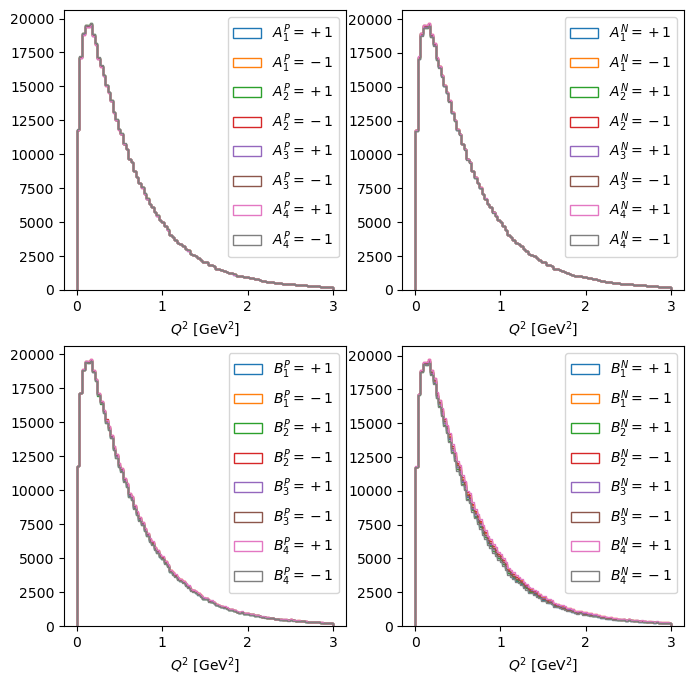

In [16]:
import matplotlib.pyplot as plt

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(8,8))

for FF, pFF, ax in [ ("AP", "A^{P}", ax1),  ("AN", "A^{N}", ax2),  ("BP", "B^{P}", ax3),  ("BN", "B^{N}", ax4) ]:
    columns = []
    labels = []
    for i in range(4):
        columns.append(f"ZExpELFF{FF}{i+1}CCQE=+1")
        columns.append(f"ZExpELFF{FF}{i+1}CCQE=-1")
        labels.append(f"${pFF}_{i+1} = +1$")
        labels.append(f"${pFF}_{i+1} = -1$")

    hf = pn.HistFrame(pn.Binning.lin_space(0,3,100, "$Q^2$ [GeV$^2$]"))
    hf.fill_weighted_columns_from_Arrow(evf,["Q2lep_GeV2"], columns)
    
    hf.mpl().hist_all(histtype="step", columns=columns, labels=labels, plot_axis=ax)
    ax.legend()

plt.show()